### Import Libraries

In [1]:
import pandas as pd           # For data manipulation
import numpy as np            # For numerical operations
from sklearn.model_selection import train_test_split   # For splitting data into train/test sets
from sklearn.ensemble import RandomForestClassifier    # For the random forest model
from sklearn.metrics import accuracy_score              # To evaluate model performance
import pickle                   # For saving and loading models
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

### Load Data

In [2]:
# Load the data
path = 'D:\BIM\Summer Project\project\datasets\cleaned_ibm_dataset.pkl'
data = pd.read_pickle(path)

print(data.columns)

print(data['DistanceFromHome'].max())

employee_numbers = data['EmployeeNumber']
data.drop(columns=['EmployeeNumber'])

# display(data.head())

# print(data['MonthlyIncome'].min())
# print(data['MonthlyIncome'].max())
# print(data['Age'].max())
# print(data['TotalWorkingYears'].min())
# print(data['JobSatisfaction'].max())

Index(['Age', 'Attrition', 'DistanceFromHome', 'Education', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'OverTime', 'TotalWorkingYears',
       'WorkLifeBalance', 'YearsAtCompany', 'Dept_Human Resources',
       'Dept_Research & Development', 'Dept_Sales', 'EduField_Human Resources',
       'EduField_Life Sciences', 'EduField_Marketing', 'EduField_Medical',
       'EduField_Other', 'EduField_Technical Degree',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'Divorced', 'Married', 'Single'],
      dtype='object')
29


<>:2: SyntaxWarning: invalid escape sequence '\B'
<>:2: SyntaxWarning: invalid escape sequence '\B'
C:\Users\sworn\AppData\Local\Temp\ipykernel_15380\3502154365.py:2: SyntaxWarning: invalid escape sequence '\B'
  path = 'D:\BIM\Summer Project\project\datasets\cleaned_ibm_dataset.pkl'


,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Divorced,Married,Single
0,41,1,1,2,2,0,3,2,4,5993,...,0,0,0,0,0,1,0,0,0,1
2,37,1,2,2,4,1,2,1,3,2090,...,1,0,0,0,0,0,0,0,0,1
3,33,0,3,4,4,0,3,1,3,2909,...,0,0,0,0,1,0,0,0,1,0
4,27,0,2,1,1,1,3,1,2,3468,...,1,0,0,0,0,0,0,0,1,0
5,32,0,2,2,4,1,3,1,4,3068,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,23,2,3,1,4,2,4,2571,...,1,0,0,0,0,0,0,0,1,0
1466,39,0,6,1,4,1,2,3,1,9991,...,0,0,0,0,0,0,0,0,1,0
1467,27,0,4,3,2,1,4,2,2,6142,...,0,0,1,0,0,0,0,0,1,0
1468,49,0,2,3,4,1,2,2,2,5390,...,0,0,0,0,0,1,0,0,1,0


In [3]:
# Split the data into features and target
X = data.drop('Attrition', axis=1) # Input variables
y = data['Attrition'] # Variable to predict

# Oversampling the minority class
print(Counter(y))
over = RandomOverSampler(random_state=42) # Create an instance of SMOTE
X, y = over.fit_resample(X, y)
print(Counter(y))

Counter({0: 1214, 1: 236})
Counter({1: 1214, 0: 1214})


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=41)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Standardize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Save the fitted scaler and column order
with open('D:\\BIM\\Summer Project\\project\\models\\encoders.pkl', 'wb') as f:
    pickle.dump({
        'scaler': scaler,             # Save the fitted StandardScaler
        'columns': X.columns.tolist() # Save column order
        # If you used encoders, you'd also save them here
    }, f)

(1821, 35) (607, 35) (1821,) (607,)


In [5]:
# Create and train the logistic regression model
model = RandomForestClassifier(n_estimators=100, random_state=42) # Instance of the model
model.fit(X_train, y_train) # Train the model

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, predictions)
print(f'\nModel accuracy: {accuracy:.2f}\n')

from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))


Model accuracy: 0.97

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       303
           1       0.95      0.99      0.97       304

    accuracy                           0.97       607
   macro avg       0.97      0.97      0.97       607
weighted avg       0.97      0.97      0.97       607



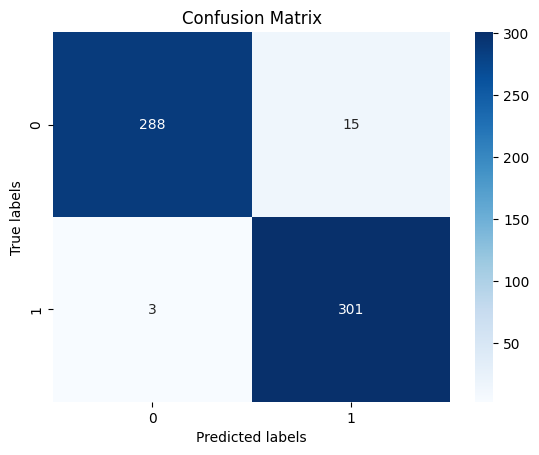

In [13]:
# Plot the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Save confusion matrix as a PNG file BEFORE plt.show()
plt.savefig('D:\\BIM\\Summer Project\\project\\models\\confusion_matrix.png')

plt.show()

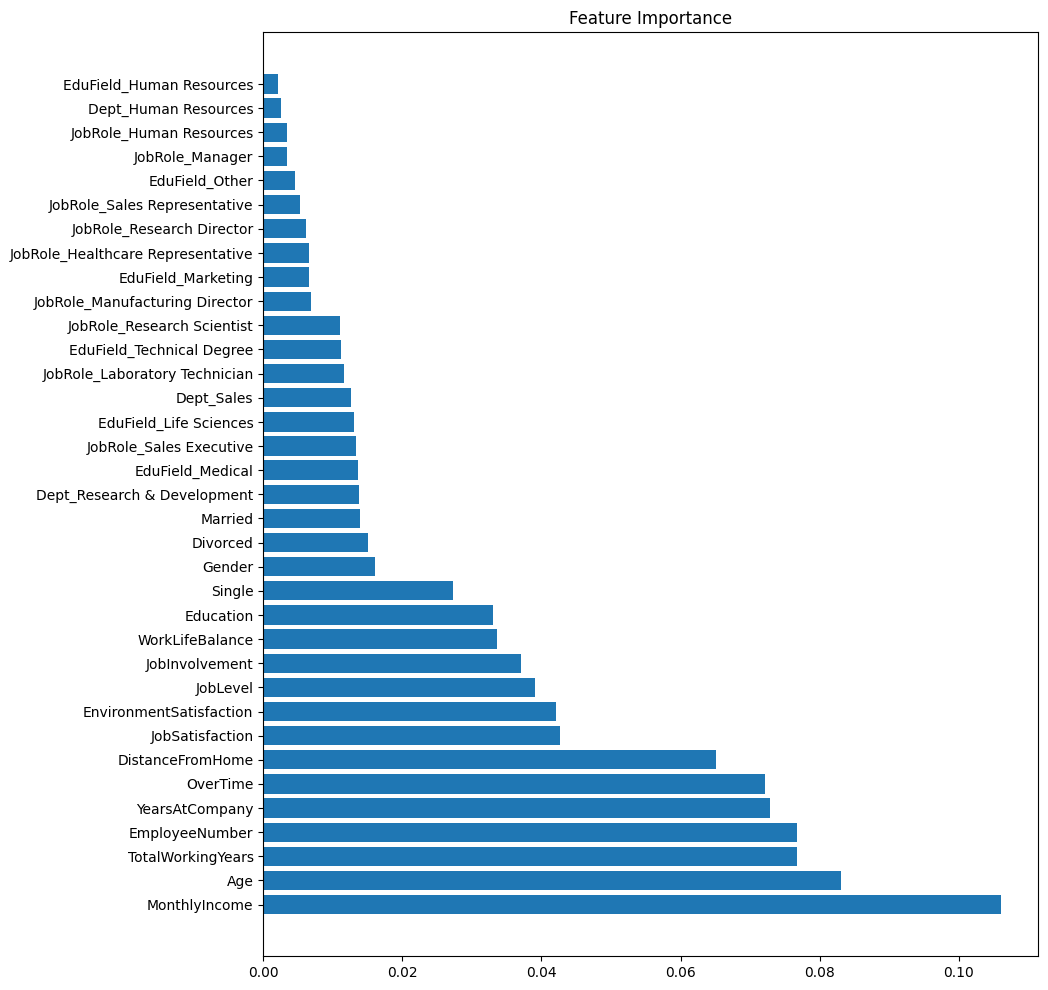

In [7]:
features = X.columns
importance = model.feature_importances_
indices =np.argsort(importance)[::-1]
names = [features[i] for i in indices]

# print("Feature ranking:")
# for i in range(X.shape[1]):
#     print(f"{i + 1}. {names[i]} ({importance[indices[i]]})")

plt.figure(figsize=(10, 12))
plt.title("Feature Importance")
plt.barh(range(X.shape[1]), importance[indices])
plt.yticks(range(X.shape[1]), labels=names)
plt.show()

In [8]:
# Save the model
import pickle

model_path = 'D:\\BIM\\Summer Project\\project\\models\\random-forest-model.pkl'
with open(model_path, 'wb') as file:
    pickle.dump((model, X.columns.tolist()), file)